In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading the dataset
df = pd.read_csv('C:/Users/CancellationPredictor/bookings.csv')
pd.set_option('display.max_columns',None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Please do check out below github link for Python code and Medium blog which got featured in Analytics Vidhya which helps in understanding Exploratory Data Analysis (EDA) performed on the data set : 

- https://github.com/ChaithanyaVamshi/HotelCancellationPredictor/blob/master/EDA.ipynb
- https://medium.com/analytics-vidhya/exploratory-data-analysis-eda-for-predicting-hotel-booking-cancellations-using-machine-learning-3990be4af2ff


####  In Data Analysis We will Analyze  Below:
1. Exploring Numerical Features
2. Exploring Categorical Features
3. Handling Missing Values in the data set
4. Encoding Categorical Variables
5. Relationship between independent and dependent feature (Correlation Heat map)

#### 1. Exploring Numerical Features

In [8]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'object']
print("Number of Numerical Features are : ",len(num_feature))

Number of Numerical Features are :  20


In [9]:
df[num_feature][:5]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


#### 2. Exploring Categorical Features

In [10]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [11]:
df[cat_feature][:5]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


#### 3. Handling Missing/Null Values in the data set

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Check % of Missing Values in the Data set

In [13]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {}% Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

children : 0.0% Missing values
country : 0.0041% Missing values
agent : 0.1369% Missing values
company : 0.9431% Missing values


- **From the above Analysis, it shows percentage of missing values in feature.** 
- **The "Company" feature has almost 94% missing values. Therefore, we do not have enough values to fill the rows or Impute the company column by mean, median etc. Hence we can drop the "Company" feature.**
- **The "Agent" feature has 13.69%  missing values. "Agent" feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Since, missing values are 13% of all data we can't drop them. Therefore, missing data for "Agent" can be filled by 0.**
- **The "Country" feature has 0.4% missing values. Since missing data of "Country" is less than 1%, we can will impute with most frequent value (Mode).**
- **The "Children" feature has only 4 missing values and we can fill these missing values by 0 considering guests have no children.**

In [14]:
#Dropping the "Company" feature
df.drop(columns = ['company'],inplace= True)

In [15]:
#Filling missing values by 0 for "Agent" feature
df['agent']= df['agent'].fillna(0)

In [16]:
#Imputing missing values of "Country" feature
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [17]:
#Filling missing values by 0 for "Children" feature 
df['children']= df['children'].fillna(0)

- **All missing values in the data set are handled succcessfully.**

In [18]:
df1 = df.copy()

#### 4. Feature Encoding (Encoding Categorical Variables)

In [20]:
cat_feature = [feature for feature in df1.columns if df1[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [21]:
df1[cat_feature][:5]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


- **Let us check how many unique (Distinct) labels exists in each categorical features**

In [22]:
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df1[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 5 labels 
country : 177 labels 
market_segment : 8 labels 
distribution_channel : 5 labels 
reserved_room_type : 10 labels 
assigned_room_type : 12 labels 
deposit_type : 3 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 


In [23]:
#Custom mapping
df1['hotel'] = df1['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
df1['arrival_date_month'] = df1['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [24]:
#Replacing "Undefined" with "SC" as mentioned in data set description
df1["meal"].replace("Undefined", "SC", inplace=True)

In [25]:
#Applying label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['meal'] = le.fit_transform(df1['meal'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['country'] = le.fit_transform(df1['country'])

In [26]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,121
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,121
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,122
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,122
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,123


In [27]:
df1.shape

(119390, 31)

#### 5. Relationship between independent and dependent feature (Correlation Heat map)

In [28]:
df1.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
reservation_status_date          -0.162135
booking_changes                  -0.144381
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
agent                            -0.046529
babies                           -0.032491
meal                             -0.015693
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005036
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
adults     

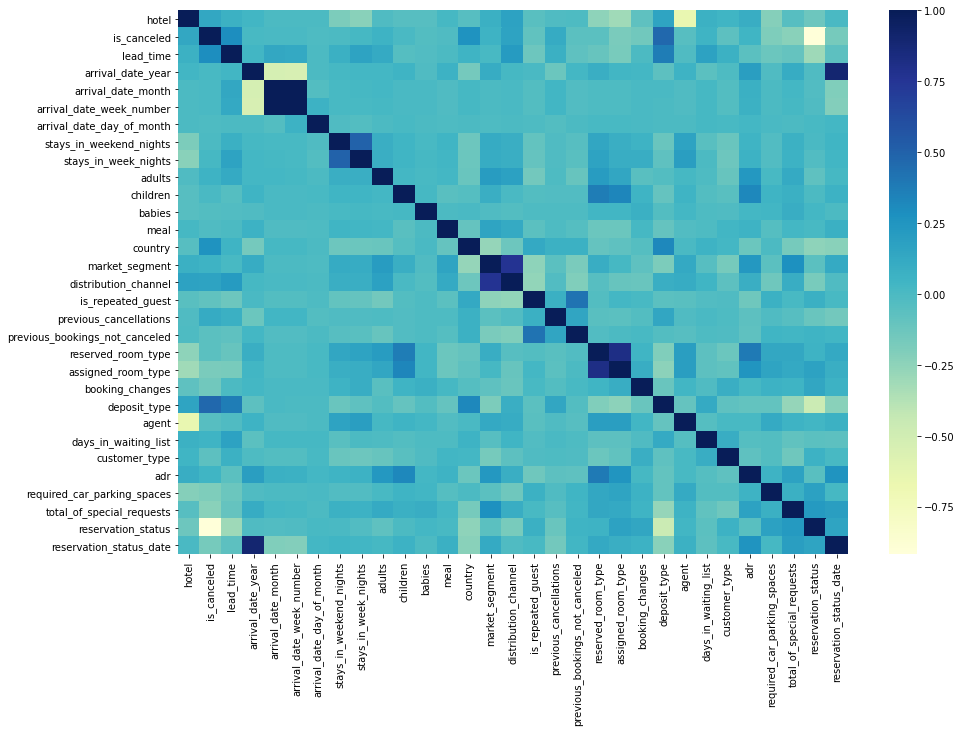

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), cmap="YlGnBu")

-  reservation_status seems to be most impactful feature and  because of its negative correlation with the is_canceled feature it can cause a wrong prediction or overfitting and there is chance of data leakage.Hence I will drop this feature.
- I will not use arrival_date_week_number, arrival_date_month, arrival_date_year,stays_in_week_nights, stays_in_weekend_nights since their importances are really low while predicting cancellations.
- reservation_status_date is date type data and it could not convert another type, this feature can also be dropped
 

In [30]:
df1.drop(columns = ['reservation_status','arrival_date_week_number','arrival_date_month','arrival_date_year','stays_in_week_nights','stays_in_weekend_nights','reservation_status_date'],inplace = True)

In [31]:
df2 = df1.copy()
df2.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,1,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0
1,0,0,737,1,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0
2,0,0,7,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0
3,0,0,13,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0
4,0,0,14,1,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1


In [32]:
df2.shape

(119390, 24)

In [33]:
X = df2.drop(['is_canceled'], axis = 1)
y = df2['is_canceled']

In [34]:
#Train and test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y,test_size = 0.30)

In [35]:
#Checking if train and test data of target feature is equally distributed
y_train.value_counts(normalize=True)

0    0.629581
1    0.370419
Name: is_canceled, dtype: float64

In [36]:
y_test.value_counts(normalize=True)

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

In [37]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state= 42)
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
lreg.score(X_train,y_train)

0.7643975925239013

In [39]:
lreg.score(X_test,y_test)

0.7621241309992461

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [41]:
dt_model.score(X_train,y_train)

0.9963265647996362

In [42]:
dt_model.score(X_test,y_test)

0.8421699193120585

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state =42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
rf_model.score(X_train,y_train)

0.9963145992126644

In [45]:
rf_model.score(X_test,y_test)

0.8846637071781557

In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [47]:
xgb.score(X_train,y_train)

0.89192681847008

In [48]:
xgb.score(X_test,y_test)

0.8726303152134461

#### Applying Hyper Parameter Tuning using Grid SeachCV for all 4 alogorithms to check best score and best parameters

In [70]:
param_grid = [{'penalty': ['l1','l2'],'C': [1,10,100],'max_iter': [100,1000],'solver': ['lbfgs','newton_cg']}]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=lreg, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Logistic Regression Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))


Logistic Regression Best score: 0.793306421106484 using best parameters {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [71]:
param_grid= { 'criterion' : ['gini', 'entropy'],'min_samples_split' : [2,4,6,8],
                  'min_samples_leaf': [1,2,3,4,5],'max_features' : ['auto', 'sqrt']}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=dt_model, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Decision Tree Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

Decision Tree Best score: 0.8449019987828967 using best parameters {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [72]:
param_grid = {'n_estimators' : [10,100,200],'min_samples_split' : [1,2,5],
              'min_samples_leaf': [1,2,5],'max_depth' : [5,8,15,25]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=rf_model, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Random Forest Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

Random Forest Best score: 0.8845919111618195 using best parameters {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [74]:
param_grid ={'max_depth':[5,8,15,25],'n_estimators': [10,100,200],'gamma': [0.05, 0.1]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator= xgb, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('XGBOOST Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

XGBOOST Best score: 0.8854892936794607 using best parameters {'gamma': 0.05, 'max_depth': 15, 'n_estimators': 200}


#### Applying StratifiedKfold Cross Validation Technique on all 4 algorithms to know the exact mean CV accuracy score of the models
- Impute the best parameters obtained in hyper tuning tuning for respective alogorithms
 

In [49]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 42)
lreg_cv_result = cross_val_score(LogisticRegression(C = 100, max_iter = 1000,penalty = 'l2',solver = 'lbfgs'),
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
lreg_cv = lreg_cv_result.mean()*100
print('Logistic Regression CV Mean Accuarcy Score is {}'.format(lreg_cv))

Logistic Regression CV Mean Accuarcy Score is 79.2252282435715


In [50]:
dt_cv_result = cross_val_score(DecisionTreeClassifier(criterion = 'entropy',max_features = 'auto',
                                                   min_samples_leaf = 2,min_samples_split = 2), 
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
dt_cv = dt_cv_result.mean()*100
print('Decision Tree CV Mean Accuarcy Score is {}'.format(dt_cv))

Decision Tree CV Mean Accuarcy Score is 85.10260490828378


In [51]:
rf_cv_result = cross_val_score(RandomForestClassifier(max_depth = 25,min_samples_leaf= 1,
                                                   min_samples_split = 2,n_estimators = 200),
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
rf_cv = rf_cv_result.mean()*100
print('Random Forest CV Mean Accuarcy Score is {}'.format(rf_cv))

Random Forest CV Mean Accuarcy Score is 88.77209146494683


In [52]:
xgb_cv_result = cross_val_score(XGBClassifier(n_estimators = 100,max_depth = 15,gamma = 0.1),
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
xgb_cv = xgb_cv_result.mean()*100
print('XGBOOST CV Mean Accuarcy Score is {}'.format(xgb_cv))

XGBOOST CV Mean Accuarcy Score is 88.99572828545104


#### Plotting Dataframe to present the mean CV accuracy score of the Models

In [53]:
Model = ['Logistic Regression','Decision Tree','Random Forest','XGBoost']
Scores = [lreg_cv,dt_cv,rf_cv,xgb_cv]
df_score = pd.DataFrame(list(zip(Model,Scores)),columns=['Model','CV_Accuracy_Score'])
df_score

,Model,CV_Accuracy_Score
0,Logistic Regression,79.225228
1,Decision Tree,85.102605
2,Random Forest,88.772091
3,XGBoost,88.995728


#### Applying Feature Selection to get the top 15 important features from the Random Forest Model

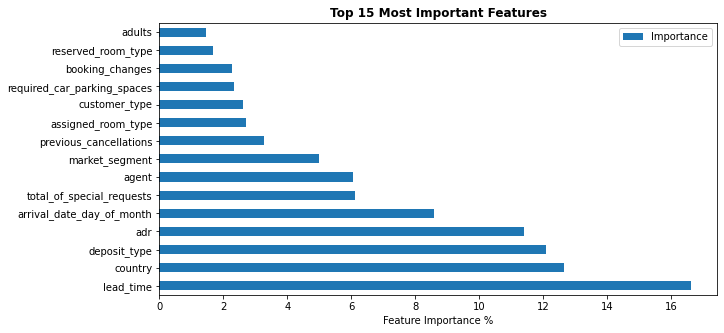

In [54]:
plt.figure(figsize =(10,5))
feature_imp = pd.Series(rf_model.feature_importances_*100 ,index = X.columns)
feature_imp.nlargest(15).plot(kind = 'barh',label = 'Importance')
plt.legend()
plt.title('Top 15 Most Important Features',weight = 'bold')
plt.xlabel('Feature Importance %')
plt.show()

In [75]:
#Since the size of the pickle file is more, I will compress the pickle file using BZ2 library**
import bz2,pickle
sfile = bz2.BZ2File('rfmodel_pickle.pkl','wb')
pickle.dump(rf_model,sfile)
sfile.close()

In [56]:
df3 = df2.copy()

In [57]:
df3.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,1,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0
1,0,0,737,1,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0
2,0,0,7,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0
3,0,0,13,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0
4,0,0,14,1,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1


In [59]:
#Inorder to build the web app, I will use the 10 most important features that are helpful in predicting the cancelation from the guests since we it would be pain to front end user to fill all 23 features on he web app. I will drop the rest of features so we can build an interactive and user friendly web app.
X = df3.drop(['is_canceled','hotel','arrival_date_day_of_month','adults','children','babies','meal','country','distribution_channel','is_repeated_guest',
              'previous_bookings_not_canceled','reserved_room_type','agent','days_in_waiting_list'],axis = 1)
y = df3['is_canceled']

In [60]:
#Train and test data again to check if there is any drop in accuracy of the model after eliminating features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y,test_size = 0.30)

In [61]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state= 42)
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
lreg.score(X_train,y_train)

0.7815921410024769

In [63]:
lreg.score(X_test,y_test)

0.7798531423625653

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [65]:
dt_model.score(X_train,y_train)

0.9808789920189535

In [66]:
dt_model.score(X_test,y_test)

0.8117095234106709

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state =42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [68]:
rf_model.score(X_train,y_train)

0.9808670264319816

In [69]:
rf_model.score(X_test,y_test)

0.838652036742329

In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [97]:
xgb.score(X_train,y_train)

0.8160530314814594

In [71]:
xgb.score(X_test,y_test)

0.8317558701175419

In [ ]:
# I will choose Random Forest Model since we have received highest accuracy earlier and apply hyper paramter tuning using GridsearchCV
param_grid = {'n_estimators' : [10,100,200],'min_samples_split' : [1,2,5],
              'min_samples_leaf': [1,2,5],'max_depth' : [5,8,15,25]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=rf_model, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Random Forest Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))


In [72]:
#Impute the best hyperparameters obtained below and check the mean Cross validation score of the model
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 42)
rf_cv_result = cross_val_score(RandomForestClassifier(max_depth = 25,min_samples_leaf= 1,
                                                   min_samples_split = 5,n_estimators = 100),
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
rf_cv = rf_cv_result.mean()*100
print('Random Forest CV Mean Accuarcy Score is {}'.format(rf_cv))

Random Forest CV Mean Accuarcy Score is 84.95435128570233


In [ ]:
#There is drop in 3% accuracy when compared to first Random Forest Model with 23 features.

In [74]:
#Compresssing the pickle file which has 10 features to build web app
import bz2,pickle
file = bz2.BZ2File('modelfinal.pkl','wb')
pickle.dump(rf_model,file)
file.close()